# Imports (Dependencies list is not minimal)

In [57]:
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
from geocube.api.core import make_geocube
import rasterio as rio
import scipy.stats as stats
import numpy as np
from datetime import datetime, date
import math
import random
from matplotlib import colors
import seaborn as sns


pd.set_option('display.max_columns', None)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.metrics import confusion_matrix


In [58]:
positive = pd.read_csv('https://raw.githubusercontent.com/Aser-Abdelfatah/Portugal-Wildfire-Research/main/Portugal_Dataset_Extraction/Datasets/Burned_Data/climatic_and_meteorological_data_after_imputation.csv', index_col=None)
positive = positive.drop(columns=['Unnamed: 0'])
negative = pd.read_csv('https://raw.githubusercontent.com/Aser-Abdelfatah/Portugal-Wildfire-Research/main/Portugal_Dataset_Extraction/Datasets/Non_Burned_Data/climatic_and_meteorological_data_after_imputation.csv', index_col=None)
negative = negative.drop(columns=['Unnamed: 0'])

In [59]:
positive = positive.reindex(sorted(positive.columns), axis=1)
negative = negative.reindex(sorted(negative.columns), axis=1)

# Visualize fire and non-fire pixels

C:\Users\asera\AppData\Local\Temp\ipykernel_13488\1391791648.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))
C:\Users\asera\AppData\Local\Temp\ipykernel_13488\1391791648.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))
c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


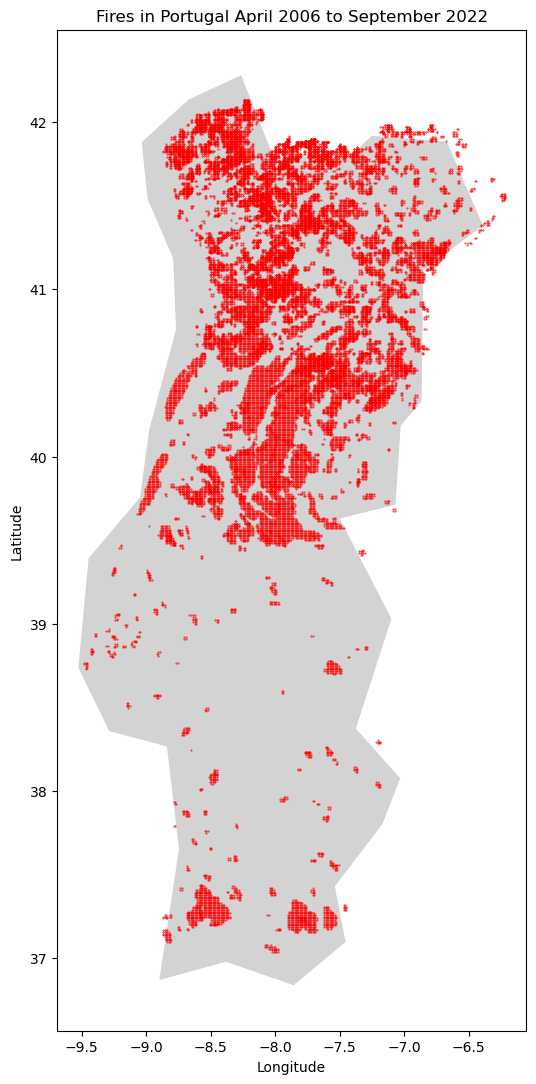

In [60]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()
#countries[countries["name"] == "Portugal"].plot(color="lightgrey")


# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Portugal"].plot(color="lightgrey", ax=ax)
# parse dates for plot's title
first_month ="April 2006"
last_month = "September 2022"
# plot points
positive.plot(x="x", y="y", kind="scatter", 
        c="red", colormap="YlOrRd",  s= 0.15, figsize=(20,13),
        title=f"Fires in Portugal {first_month} to {last_month}", 
        ax=ax)
# add grid
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

C:\Users\asera\AppData\Local\Temp\ipykernel_13488\803361947.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))
C:\Users\asera\AppData\Local\Temp\ipykernel_13488\803361947.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))
c:\Users\asera\anaconda3\envs\nnproject\lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


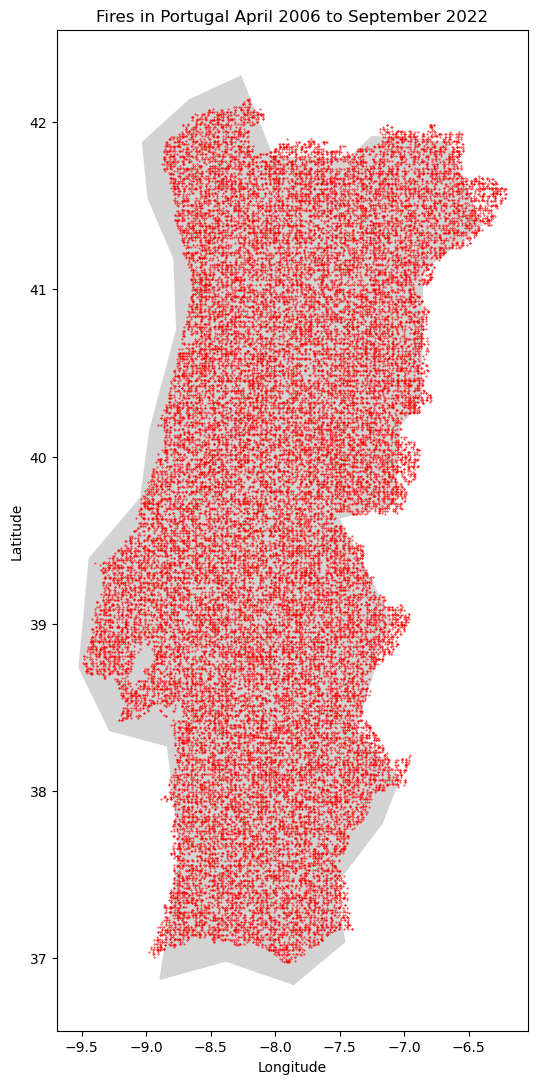

In [61]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()
#countries[countries["name"] == "Portugal"].plot(color="lightgrey")


# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Portugal"].plot(color="lightgrey", ax=ax)
# parse dates for plot's title
first_month ="April 2006"
last_month = "September 2022"
# plot points
negative.plot(x="x", y="y", kind="scatter", 
        c="red", colormap="YlOrRd",  s= 0.15, figsize=(20,13),
        title=f"Fires in Portugal {first_month} to {last_month}", 
        ax=ax)
# add grid
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [62]:
positive

,aspect,burned_areas,cos_day_of_the_year,cos_month,curvature,d2m,d2m_mean,day,day_of_the_year,dem,ignition_points,lai,lc_agriculture,lc_forest,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,lst_day,lst_day_mean,lst_night,lst_night_mean,month,ndvi,population,repetitions,rh,rh_mean,roads_distance,sin_day_of_the_year,sin_month,slope,smi,sp,sp_mean,ssrd,ssrd_mean,t2m,t2m_mean,time,tp,tp_mean,wind_direction,wind_direction_mean,wind_speed,wind_speed_mean,x,x_int,y,y_int,year
0,218.323290,1.0,0.073095,0.5,-13973.8610,282.985130,285.027725,5,278,22.818422,0.0,1.560438,0.061867,0.358775,0.000000,0.000000,0.034659,0.000000,0.441838,0.102861,296.929645,293.054429,288.032020,284.846219,10,0.580369,1.502658,1,0.230728,0.559804,0.000,-0.997325,-8.660254e-01,1.558401,0.13765,96798.682835,96643.868063,8.743087e+06,8.244722e+06,301.909588,292.715788,2018-10-05,2.902481e-04,0.004570,335.422999,270.261873,5.275411,4.736493,-9.480614,-948,38.757993,3875,2018.0
1,238.144700,1.0,0.073095,0.5,4664.3843,283.884934,285.144731,5,278,212.681440,0.0,3.700000,0.222479,0.501165,0.000000,0.037123,0.201721,0.000000,0.000000,0.037511,301.220000,292.744019,291.500000,285.364868,10,0.543300,54.910294,1,0.198069,0.564793,0.172,-0.997325,-8.660254e-01,1.557888,0.13765,96990.468887,96855.195703,8.991473e+06,8.313999e+06,304.063908,292.659526,2018-10-05,8.134970e-05,0.004674,310.042245,268.060353,4.687839,4.527946,-9.480614,-948,38.768062,3876,2018.0
2,285.109130,1.0,0.073095,0.5,-2931.3470,283.648578,285.095545,5,278,22.934958,0.0,0.628860,0.094327,0.289674,0.000000,0.299544,0.000000,0.150371,0.166084,0.000000,302.180000,293.242218,289.720000,286.102203,10,0.355900,20.905184,1,0.211429,0.558188,0.000,-0.997325,-8.660254e-01,1.537272,0.15544,96903.455930,96938.469508,9.025677e+06,8.340271e+06,302.134732,292.706102,2018-10-05,2.370733e-05,0.004115,345.993297,268.375318,5.415241,4.831436,-9.470545,-947,38.727786,3872,2018.0
3,258.798920,1.0,0.073095,0.5,-5164.5044,282.971710,285.086191,5,278,18.108190,0.0,1.788257,0.055267,0.467525,0.110535,0.000000,0.000000,0.087259,0.279414,0.000000,296.203893,293.303680,289.940000,286.564392,10,0.640941,4.693551,1,0.247109,0.559661,0.000,-0.997325,-8.660254e-01,1.542442,0.15544,96842.639444,96719.479769,8.829953e+06,8.310035e+06,301.057931,292.726538,2018-10-05,1.120156e-04,0.004895,317.386291,259.767710,4.934384,4.492348,-9.470545,-947,38.737855,3873,2018.0
4,234.107250,1.0,0.073095,0.5,-6697.9670,283.256960,285.004559,5,278,34.618267,0.0,1.717887,0.077921,0.610518,0.012849,0.000000,0.000000,0.000000,0.298713,0.000000,298.409405,293.894523,287.948147,284.386758,10,0.624734,1.748590,1,0.220172,0.557528,0.000,-0.997325,-8.660254e-01,1.553220,0.13765,96754.398600,96623.456931,8.826432e+06,8.251281e+06,302.463744,292.695987,2018-10-05,1.780292e-04,0.004377,316.860164,267.221810,5.280971,4.727574,-9.470545,-947,38.747924,3874,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34564,106.000244,1.0,-0.645348,-0.5,-7686.9326,283.891660,281.450806,21,233,656.406300,0.0,0.900000,0.221780,0.177264,0.000000,0.000000,0.600956,0.000000,0.000000,0.000000,314.259980,299.066650,294.180000,282.593445,8,0.394500,0.017831,2,0.151507,0.459807,4.148,-0.763889,-8.660254e-01,1.541004,0.20800,93184.266000,93441.539062,1.313773e+07,8.400288e+06,304.147340,291.294800,2013-08-21,7.450581e-09,0.002467,267.504880,169.931061,4.061390,3.787230,-6.218267,-621,41.547098,4154,2013.0
34565,106.000244,1.0,-0.976938,-1.0,-7686.9326,287.920400,281.450806,19,170,656.406300,0.0,1.000000,0.221780,0.177264,0.000000,0.000000,0.600956,0.000000,0.000000,0.000000,315.763614,299.066650,292.044794,282.593445,6,0.480000,0.017911,2,0.222242,0.459807,4.148,0.213521,1.224647e-16,1.541004,0.32760,93423.055000,93441.539062,1.417653e+07,8.400288e+06,306.383300,291.294800,2017

In [63]:
negative

,aspect,burned_areas,cos_day_of_the_year,cos_month,curvature,d2m,d2m_mean,day,day_of_the_year,dem,ignition_points,lai,lc_agriculture,lc_forest,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,lst_day,lst_day_mean,lst_night,lst_night_mean,month,ndvi,population,repetitions,rh,rh_mean,roads_distance,sin_day_of_the_year,sin_month,slope,smi,sp,sp_mean,ssrd,ssrd_mean,t2m,t2m_mean,time,tp,tp_mean,wind_direction,wind_direction_mean,wind_speed,wind_speed_mean,x,x_int,y,y_int,year
0,242.34691,0.0,0.209315,5.000000e-01,25867.83600,288.581861,285.831087,13,286,174.015980,0.0,1.510276,0.153392,0.248340,0.0,0.000000,0.021067,0.000000,0.397186,0.180015,297.460000,292.744019,289.921143,285.364868,10,0.6495,1.598184,1,0.487399,0.535287,0.000,-0.977848,-8.660254e-01,1.560071,0.79834,99358.562604,294.057190,7.855613e+06,0.003859,299.418029,99301.539777,2006-10-13,0.000575,8.385036e+06,233.514099,261.426535,4.024897,4.970370,-9.490683,-949,38.768062,3876,2006.0
1,203.67657,0.0,-0.645348,-5.000000e-01,4183.31740,288.846763,285.828703,21,233,50.300114,0.0,0.900000,0.685615,0.221857,0.0,0.092528,0.000000,0.000000,0.000000,0.000000,295.320000,295.154327,288.740000,286.490448,8,0.4828,127.543106,1,0.564812,0.531238,0.371,-0.763889,-8.660254e-01,1.536229,0.27312,98904.241156,294.132488,9.231873e+06,0.003638,296.316632,99523.227419,2007-08-21,0.008807,8.435218e+06,306.835549,262.570826,5.129905,4.620257,-9.460476,-946,38.707648,3870,2007.0
2,356.89250,0.0,0.842942,8.660254e-01,-2708.69900,284.399747,285.672607,28,332,140.850330,0.0,1.100000,0.980001,0.010364,0.0,0.009636,0.000000,0.000000,0.000000,0.000000,288.000000,293.176636,282.880000,284.645844,11,0.6544,378.000800,1,0.597561,0.531324,0.000,-0.538005,-5.000000e-01,1.558537,0.96884,99243.161913,294.029736,4.374247e+06,0.003780,291.551130,99180.379550,2006-11-28,0.004172,8.383448e+06,200.780941,262.346303,4.290441,4.857074,-9.460476,-946,38.798269,3879,2006.0
3,189.51236,0.0,-0.150055,-5.000000e-01,4144.87900,283.539066,285.833435,9,100,98.617560,0.0,0.700000,0.293637,0.036163,0.0,0.670200,0.000000,0.000000,0.000000,0.000000,293.892189,296.984985,283.799997,286.307220,4,0.5359,794.456100,1,0.487976,0.531151,0.000,0.988678,8.660254e-01,1.506740,0.57735,99283.991550,294.130288,9.791197e+06,0.003640,292.419824,99478.060241,2008-04-09,0.003572,8.478794e+06,265.845949,260.969589,5.022045,4.736585,-9.440338,-944,38.727786,3872,2008.0
4,312.31247,0.0,-0.012910,-1.836970e-16,5228.36900,286.931152,285.711196,30,273,128.883530,0.0,0.500000,0.591861,0.074911,0.0,0.333228,0.000000,0.000000,0.000000,0.000000,297.000247,292.570526,286.453662,284.226288,9,0.4299,860.879000,1,0.468656,0.539384,0.000,-0.999917,-1.000000e+00,1.481594,0.30975,98696.127622,293.813498,7.705279e+06,0.004122,297.409173,99024.864181,2007-09-30,0.005079,8.358323e+06,193.726530,234.072586,4.773298,4.922953,-9.440338,-944,38.848614,3884,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36789,224.46973,0.0,-0.548843,-8.660254e-01,3579.60200,277.682460,281.070038,5,125,834.679300,0.0,0.900000,0.948254,0.051746,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,298.180000,296.895935,281.780000,281.409027,5,0.3755,0.000000,1,0.241955,0.454588,1.836,0.835925,5.000000e-01,1.524173,0.50391,93410.920000,291.153717,1.454524e+07,0.002520,294.898960,92977.531250,2022-05-05,0.000000,8.357900e+06,59.480873,169.491211,2.984112,3.872242,-6.288750,-628,41.637719,4163,2022.0
36790,236.74323,0.0,0.985220,1.000000e+00,1102.45970,281.336580,281.341949,21,355,746.876900,0.0,0.800000,0.891228,0.068298,0.0,0.000000,0.040474,0.000000,0.000000,0.000000,283.763751,298.820801,275.216907,281.423889,12,0.6134,0.000000,1,0.745652,0.459084,1.445,-0.171293,-2.449294e-16,1.487295,0.86649,94460.250000,291.262207,1.693210e+06,0.002530,284.732100,93331.078125,2018-12-21,0.

# Random Forest (All Features)

In [64]:
#combine burned and non_burned data
data = pd.concat([positive, negative])
data = data.reset_index(drop=True)
# remove 5 wrong data points. They are wrong because burned_areas is either 1 or 2
data = data.drop(data[data['burned_areas'] == 2].index)
data = data.reset_index(drop=True)

data['burned_areas'] = data['burned_areas'].astype(int)

## irrelevant columns
cols = [ 'time', 'day_of_the_year', 'x_int', 'y_int', 'day', 'month', 'ignition_points',  'repetitions']
data = data.drop(columns=cols)

#specify output and input
output = data['burned_areas']
input = data.drop('burned_areas', axis=1)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.5)

#training
rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)

# predictions
y_pred = rf2.predict(X_test)

# accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [65]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[18506     0]
 [    0 17173]]


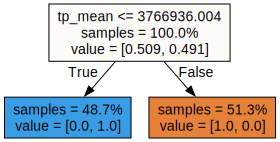

In [66]:
# print the first few decisions

for i in range(1):
    tree = rf2.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [67]:
# Tries to find the best hyperparameters for the model using grid search


param_dist = {'n_estimators': randint(1,500),
              'max_depth': randint(1,100)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024E1FB765E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024E1FC26DF0>})

In [68]:
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 407}


This is very over-fitting, so we need to reduce the model complexity.

In [69]:
param_dist = {'n_estimators': randint(1,20),
              'max_depth': randint(1,10)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 9}


In [70]:
# Trying random forest with the best hyperparameters
#training
rf2 = RandomForestClassifier(max_depth=5, n_estimators=15)
rf2.fit(X_train, y_train)

# predictions
y_pred = rf2.predict(X_test)

# accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [71]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[18506     0]
 [    0 17173]]


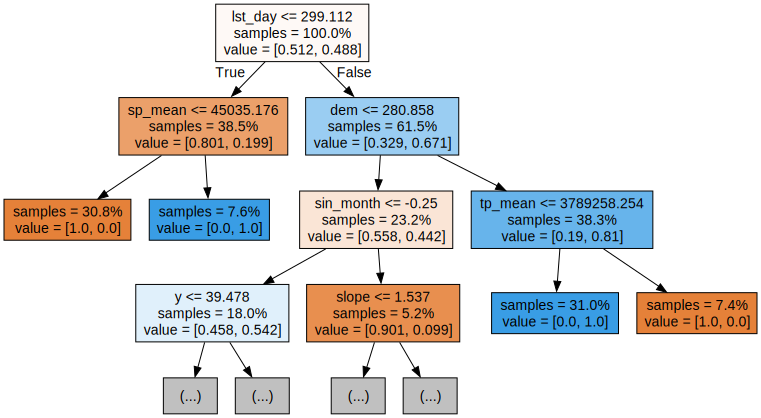

In [72]:
# print the first few decisions

for i in range(1):
    tree = rf2.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

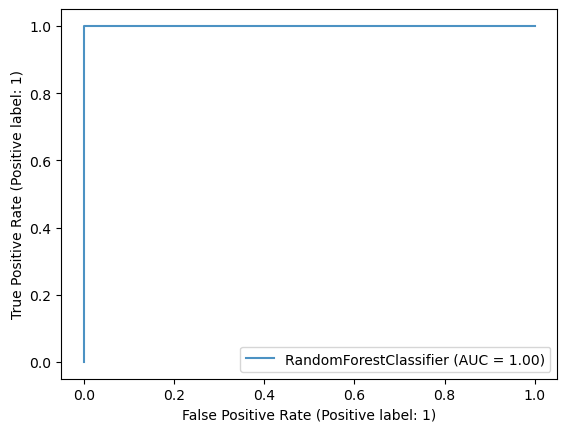

In [73]:
ax = plt.gca()
model_disp = RocCurveDisplay.from_estimator(rf2, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

tp_mean                 0.252001
sp_mean                 0.221901
t2m_mean                0.153514
ssrd_mean               0.110625
rh                      0.064452
lst_day                 0.046705
tp                      0.029681
t2m                     0.020789
rh_mean                 0.018038
sin_month               0.017207
smi                     0.016102
lst_night               0.016031
lst_day_mean            0.010876
y                       0.007159
dem                     0.006109
lst_night_mean          0.002264
lc_agriculture          0.001431
cos_day_of_the_year     0.001359
d2m                     0.001155
cos_month               0.000983
ssrd                    0.000665
sp                      0.000382
sin_day_of_the_year     0.000295
slope                   0.000276
wind_direction          0.000000
wind_direction_mean     0.000000
wind_speed              0.000000
wind_speed_mean         0.000000
x                       0.000000
aspect                  0.000000
roads_dist

<Axes: >

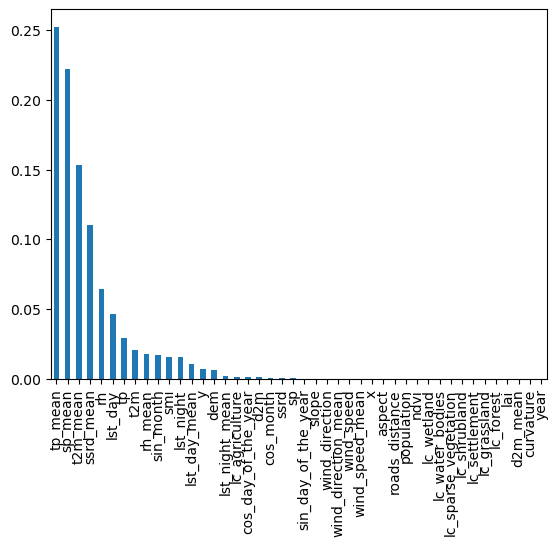

In [74]:
# Estimate the feature importance
feature_imp = pd.Series(rf2.feature_importances_, index=X_test.columns).sort_values(ascending=False)
print(feature_imp)
    
# Plot the feature importance 
feature_imp.plot.bar()

## Susceptibility Map

In [75]:
predprob_rf = rf2.predict_proba(input)


In [76]:
rf_testprob_fire = predprob_rf[:,1]

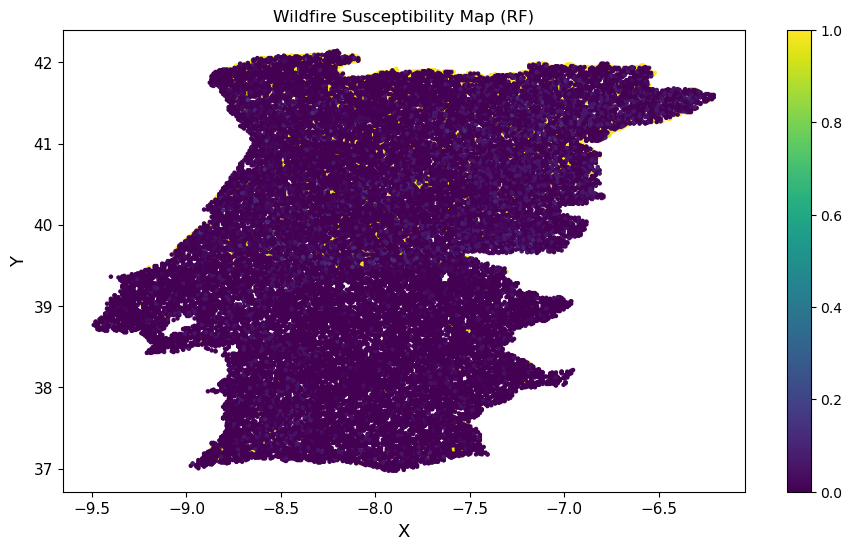

In [77]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(6+5,4+2))
cmploy = ax.scatter(input['x'],input['y'],s=5,c=rf_testprob_fire, cmap='viridis')
plt.colorbar(cmploy,ax=ax)
ax.set_title('Wildfire Susceptibility Map (RF)')
ax.set_ylabel('Y',size=13)
ax.set_xlabel('X',size=13)
ax.tick_params(axis='both', which='major', labelsize=11)
plt.show()

# Random Forest (Climatic Features)

In [79]:
#combine burned and non_burned data
data = pd.concat([positive, negative])
data = data.reset_index(drop=True)
# remove 5 wrong data points. They are wrong because burned_areas is either 1 or 2
data = data.drop(data[data['burned_areas'] == 2].index)
data = data.reset_index(drop=True)

data['burned_areas'] = data['burned_areas'].astype(int)

## irrelevant columns
cols = [ 'time', 'day_of_the_year', 'x_int', 'y_int', 'day', 'month', 'ignition_points',  'repetitions', 'wind_speed', 'wind_direction', 'tp', 't2m', 'ssrd', 'sp', 'rh', 'lst_night', 'd2m','lst_day']
data = data.drop(columns=cols)

#specify output and input
output = data['burned_areas']
input = data.drop('burned_areas', axis=1)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.5)

#training
rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)

# predictions
y_pred = rf2.predict(X_test)

# accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [81]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[18407     0]
 [    0 17272]]


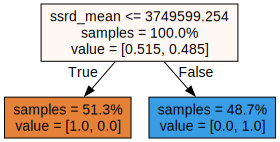

In [82]:
# print the first few decisions

for i in range(1):
    tree = rf2.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [83]:
# Tries to find the best hyperparameters for the model using grid search


param_dist = {'n_estimators': randint(1,500),
              'max_depth': randint(1,100)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024E1E898EE0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024E24431F40>})

In [84]:
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 83, 'n_estimators': 13}


This is very over-fitting, so we need to reduce the model complexity.

In [85]:
param_dist = {'n_estimators': randint(1,20),
              'max_depth': randint(1,10)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'n_estimators': 4}


In [86]:
# Trying random forest with the best hyperparameters
#training
rf2 = RandomForestClassifier(max_depth=5, n_estimators=15)
rf2.fit(X_train, y_train)

# predictions
y_pred = rf2.predict(X_test)

# accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [87]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[18407     0]
 [    0 17272]]


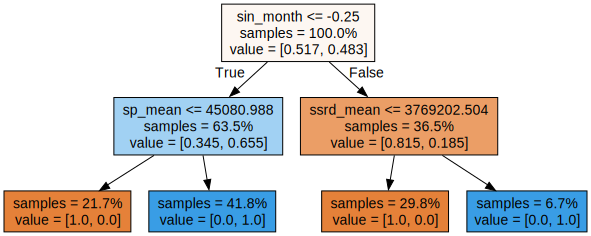

In [88]:
# print the first few decisions

for i in range(1):
    tree = rf2.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

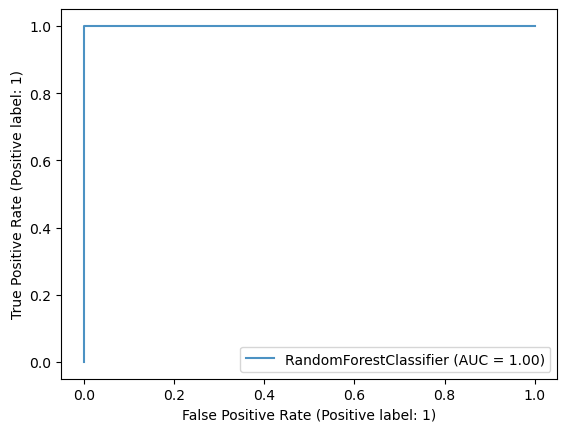

In [89]:
ax = plt.gca()
model_disp = RocCurveDisplay.from_estimator(rf2, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

tp_mean                 0.286570
t2m_mean                0.240704
sp_mean                 0.167238
ssrd_mean               0.154625
y                       0.051642
sin_month               0.023779
sin_day_of_the_year     0.021895
smi                     0.019770
cos_day_of_the_year     0.019506
slope                   0.006547
lc_forest               0.003670
lc_agriculture          0.001552
rh_mean                 0.000718
roads_distance          0.000717
year                    0.000607
population              0.000459
wind_direction_mean     0.000000
wind_speed_mean         0.000000
x                       0.000000
aspect                  0.000000
lst_night_mean          0.000000
lst_day_mean            0.000000
lc_wetland              0.000000
lc_water_bodies         0.000000
lc_sparse_vegetation    0.000000
lc_shrubland            0.000000
lc_settlement           0.000000
lc_grassland            0.000000
lai                     0.000000
dem                     0.000000
d2m_mean  

<Axes: >

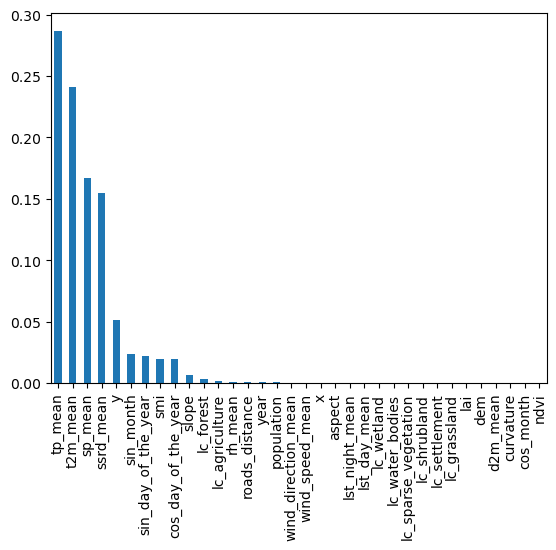

In [90]:
# Estimate the feature importance
feature_imp = pd.Series(rf2.feature_importances_, index=X_test.columns).sort_values(ascending=False)
print(feature_imp)
    
# Plot the feature importance 
feature_imp.plot.bar()

## Susceptibility Map

In [91]:
predprob_rf = rf2.predict_proba(input)


In [92]:
rf_testprob_fire = predprob_rf[:,1]

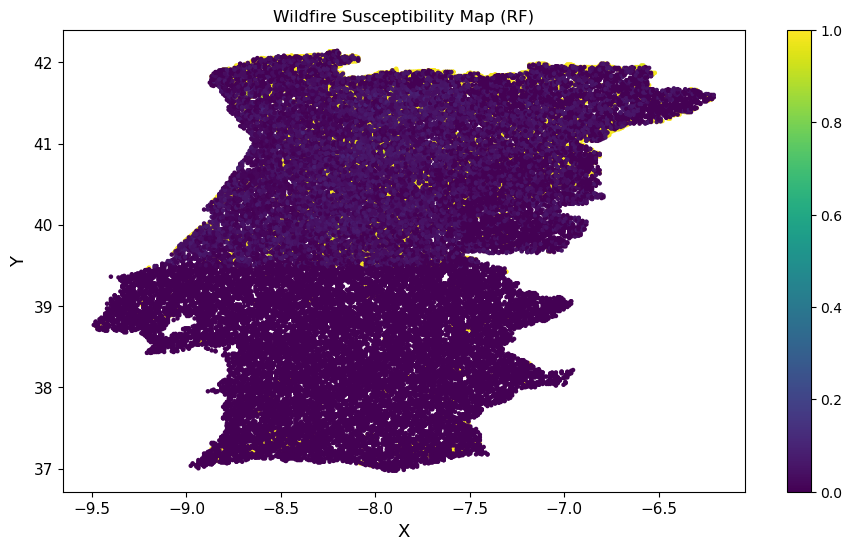

In [93]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(6+5,4+2))
cmploy = ax.scatter(input['x'],input['y'],s=5,c=rf_testprob_fire, cmap='viridis')
plt.colorbar(cmploy,ax=ax)
ax.set_title('Wildfire Susceptibility Map (RF)')
ax.set_ylabel('Y',size=13)
ax.set_xlabel('X',size=13)
ax.tick_params(axis='both', which='major', labelsize=11)
plt.show()

# Random Forest (Meteorological Features)

In [94]:
#combine burned and non_burned data
data = pd.concat([positive, negative])
data = data.reset_index(drop=True)
# remove 5 wrong data points. They are wrong because burned_areas is either 1 or 2
data = data.drop(data[data['burned_areas'] == 2].index)
data = data.reset_index(drop=True)

data['burned_areas'] = data['burned_areas'].astype(int)

## irrelevant columns
cols = [ 'time', 'day_of_the_year', 'x_int', 'y_int', 'day', 'month', 'ignition_points',  'repetitions', 'wind_speed_mean', 'wind_direction_mean', 'tp_mean', 't2m_mean', 'ssrd_mean', 'sp_mean', 'rh_mean', 'lst_night_mean', 'd2m_mean','lst_day_mean']
data = data.drop(columns=cols)

#specify output and input
output = data['burned_areas']
input = data.drop('burned_areas', axis=1)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.5)

#training
rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)

# predictions
y_pred = rf2.predict(X_test)

# accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9604248998010034


In [95]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[17411  1077]
 [  335 16856]]


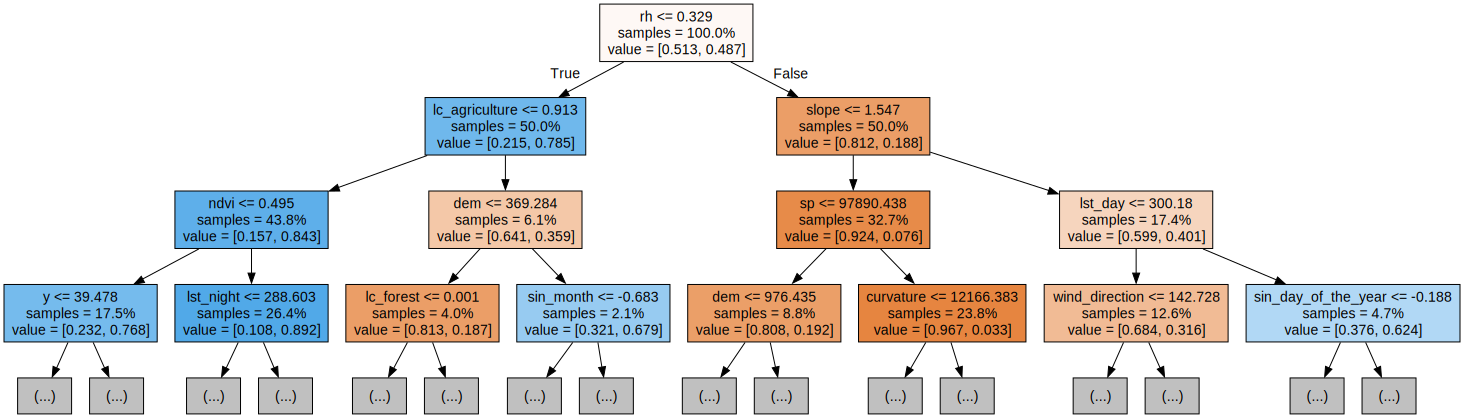

In [96]:
# print the first few decisions

for i in range(1):
    tree = rf2.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [97]:
# Tries to find the best hyperparameters for the model using grid search


param_dist = {'n_estimators': randint(1,500),
              'max_depth': randint(1,100)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024E20CFAD00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024E2142D250>})

In [98]:
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 28, 'n_estimators': 184}


This is very over-fitting, so we need to reduce the model complexity.

In [99]:
param_dist = {'n_estimators': randint(1,20),
              'max_depth': randint(1,10)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 11}


In [100]:
# Trying random forest with the best hyperparameters
#training
rf2 = RandomForestClassifier(max_depth=5, n_estimators=15)
rf2.fit(X_train, y_train)

# predictions
y_pred = rf2.predict(X_test)

# accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8997449480086326


In [101]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[16242  2246]
 [ 1331 15860]]


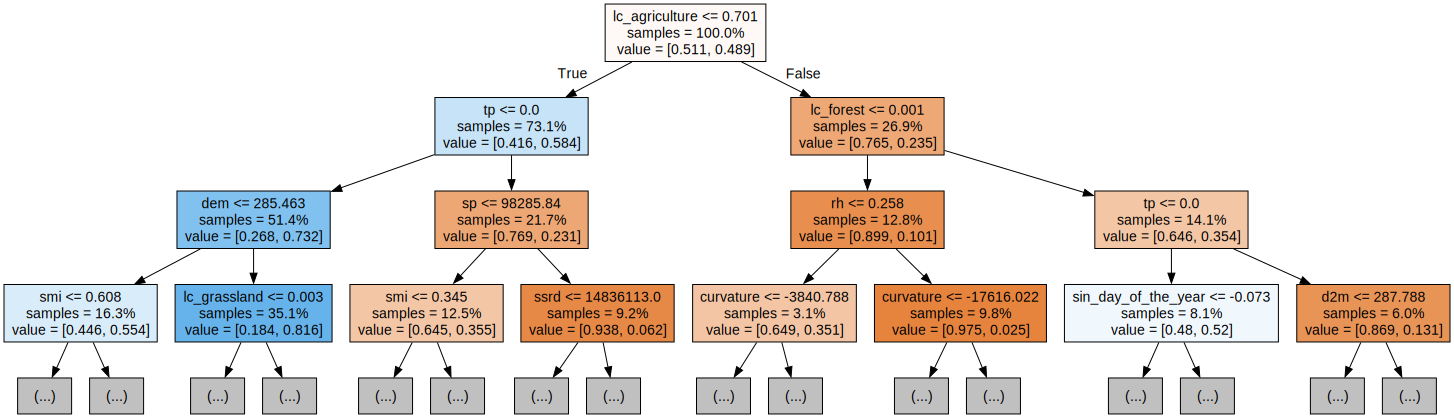

In [102]:
# print the first few decisions

for i in range(1):
    tree = rf2.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

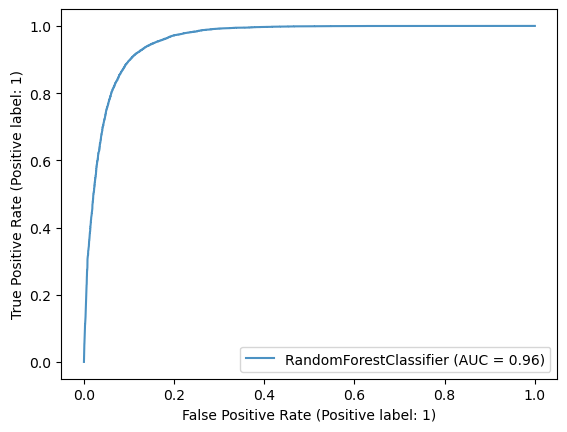

In [103]:
ax = plt.gca()
model_disp = RocCurveDisplay.from_estimator(rf2, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

rh                      0.169364
y                       0.108124
tp                      0.085397
t2m                     0.082490
ssrd                    0.081456
smi                     0.068332
sin_month               0.057883
slope                   0.044217
sin_day_of_the_year     0.043961
lst_night               0.039186
dem                     0.037241
lst_day                 0.032943
sp                      0.023347
lc_agriculture          0.020088
lc_forest               0.016675
lai                     0.013899
d2m                     0.012352
wind_direction          0.012237
lc_grassland            0.010450
cos_month               0.008774
x                       0.007748
ndvi                    0.007492
year                    0.007474
cos_day_of_the_year     0.005317
roads_distance          0.001878
curvature               0.000785
population              0.000683
lc_settlement           0.000108
wind_speed              0.000098
lc_wetland              0.000000
lc_water_b

<Axes: >

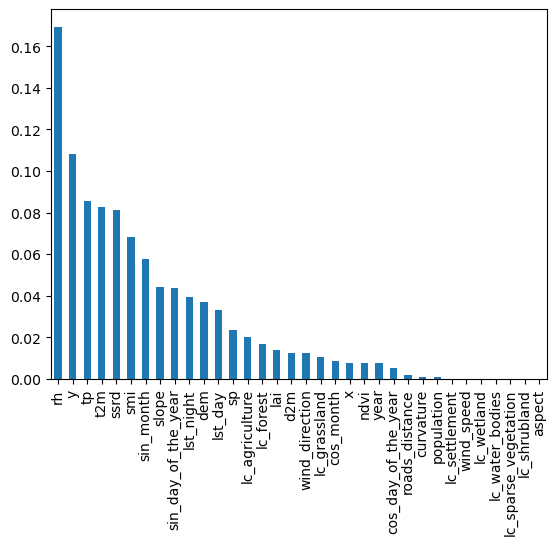

In [104]:
# Estimate the feature importance
feature_imp = pd.Series(rf2.feature_importances_, index=X_test.columns).sort_values(ascending=False)
print(feature_imp)
    
# Plot the feature importance 
feature_imp.plot.bar()

## Susceptibility Map

In [105]:
predprob_rf = rf2.predict_proba(input)


In [106]:
rf_testprob_fire = predprob_rf[:,1]

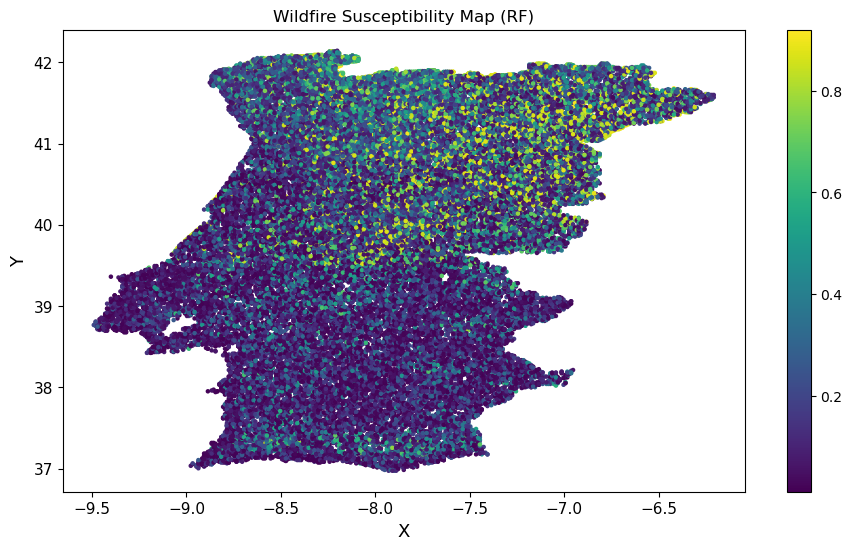

In [107]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize=(6+5,4+2))
cmploy = ax.scatter(input['x'],input['y'],s=5,c=rf_testprob_fire, cmap='viridis')
plt.colorbar(cmploy,ax=ax)
ax.set_title('Wildfire Susceptibility Map (RF)')
ax.set_ylabel('Y',size=13)
ax.set_xlabel('X',size=13)
ax.tick_params(axis='both', which='major', labelsize=11)
plt.show()